<a href="https://colab.research.google.com/github/amoghdhu/NBA-PREDICTOR/blob/main/NBA_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [ ]:
# pre-process the training data
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(X_train)

In [ ]:
# split training data
x_train, x_test, y_train, y_test = train_test_split(X_poly_train,
Y_train, test_size=0.3, random_state=0)

In [ ]:
# create model + train

# model = GradientBoostingClassifier(
#     max_features='auto',
#     n_estimators=8,
#     random_state=42,
#     max_depth=5,
#     min_samples_leaf=10,
#     learning_rate = 0.1
# )
# test accuracy:
# 0.6117546451061183
# train accuracy:
# 0.6220574760516452
# But it will overfit based on the learning curve

# model = RandomForestClassifier(
#     max_features='auto',
#     n_estimators=10,
#     random_state=42,
#     max_depth=5,
#     min_samples_leaf=100
# )
# test accuracy:
# 0.6106273808598305
# train accuracy:
# 0.6189087880049979
# But it will overfit based on the learning curve

sc = StandardScaler()
lr = LogisticRegression(max_iter=10000,random_state=11,C=1)
model = Pipeline(steps=(['scaler',sc], ['classifier',lr]))

model.fit(x_train, y_train.values.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ['classifier',
                 LogisticRegression(C=1, max_iter=10000, random_state=11)]])

In [ ]:
# predict testing data
y_pred = model.predict(x_test)

# Test score
score_gb = model.score(x_test, y_test)
print('Test accuracy:')
print(score_gb)
print('Train accuracy:')
print(model.score(x_train, y_train))

Test accuracy:
0.6093835030708233
Train accuracy:
0.6082299042065806


current degree:  1
current mse_train:  0.3917700957934194
current mse_test:  0.3906164969291767
current degree:  2
current mse_train:  0.38365680966264054
current mse_test:  0.38599082640130605
current degree:  3
current mse_train:  0.38070803831736777
current mse_test:  0.3861851823058384
current degree:  4
current mse_train:  0.37837567680133277
current mse_test:  0.38913939205473064
current degree:  5
current mse_train:  0.37536026655560184
current mse_test:  0.38925600559745005


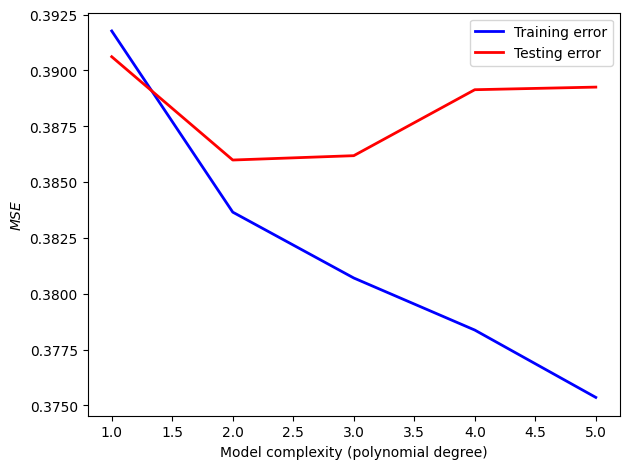

In [ ]:
# draw error curve
mse_train = []
mse_test = []

max_degree = 6

for d in range(1, max_degree):
    print('current degree: ', d)
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_test)

    sc = StandardScaler()
    lr = LogisticRegression(max_iter=10000,random_state=11,C=1)
    model = Pipeline(steps=(['scaler',sc], ['classifier',lr]))

    model.fit(X_train_poly, y_train.values.ravel())
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    print('current mse_train: ', mse_train[d-1])
    print('current mse_test: ', mse_test[d-1])


plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

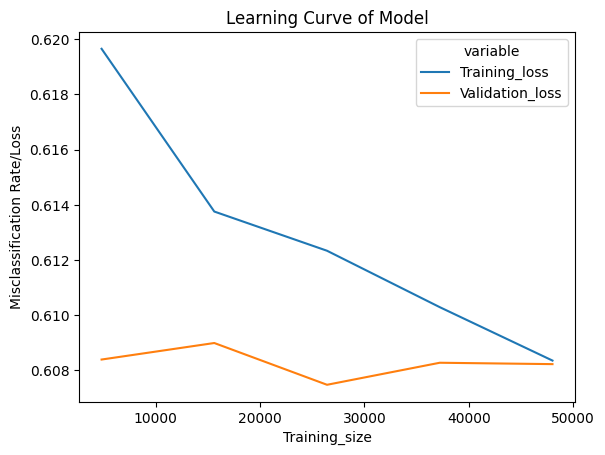

In [ ]:
# draw learning curve
def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()

train_size,train_scores,test_scores = learning_curve(
    estimator=model,
    X=x_train,
    y=y_train.values.ravel(),
    scoring=mse
)

train_scores = 1-np.mean(train_scores,axis=1)
test_scores = 1-np.mean(test_scores,axis=1)
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,
              "Validation_loss":test_scores}).melt(id_vars="Training_size")

sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Model")
plt.ylabel("Misclassification Rate/Loss");

<Axes: >

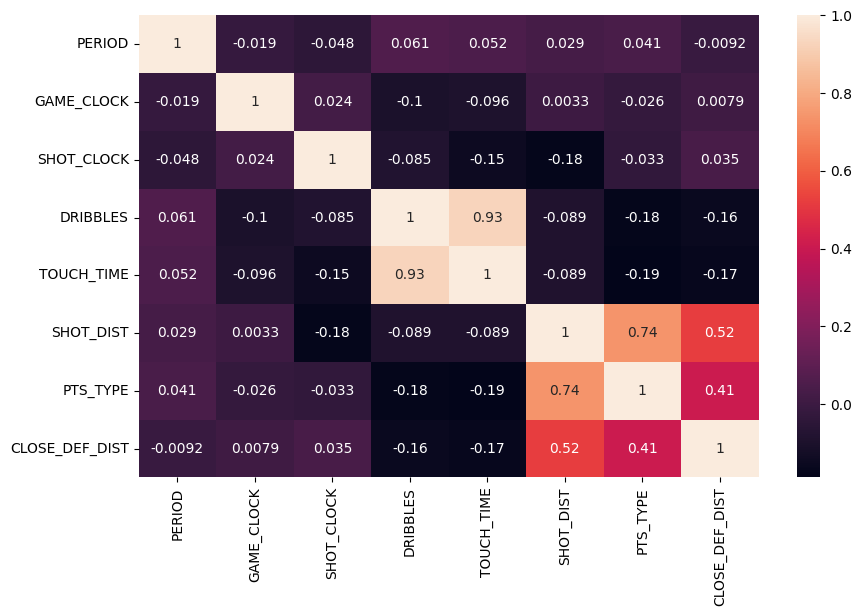

In [ ]:
cor = X_test.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

In [ ]:
# select the features that we want to focus on
X_test_selected = X_test.drop(columns = ['PERIOD', 'GAME_CLOCK',
              'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME'], axis = 1)
X_train_selected = X_train.drop(columns = ['PERIOD', 'GAME_CLOCK',
              'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME'], axis = 1)

test accuracy:
0.6021534634222188
train accuracy:
0.6044814660558101


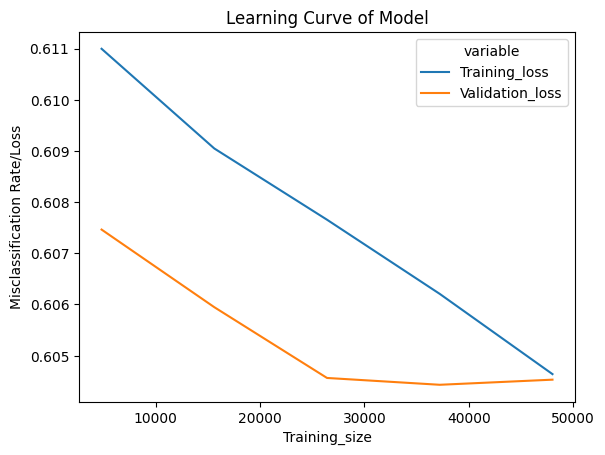

In [ ]:
# pre-process the training data
poly = PolynomialFeatures(degree=1)
X_poly_train_selected = poly.fit_transform(X_train_selected)

# split training data
x_train_selected, x_test_selected, y_train_selected, y_test_selected
= train_test_split(X_poly_train_selected, Y_train, test_size=0.3, random_state=0)

model.fit(x_train_selected, y_train_selected.values.ravel())

# predict testing data
y_pred_selected = model.predict(x_test_selected)

# Test score
score_gb = model.score(x_test_selected, y_test_selected)
print('test accuracy:')
print(score_gb)
print('train accuracy:')
print(model.score(x_train_selected, y_train_selected))

train_size,train_scores,test_scores = learning_curve(
    estimator=model,
    X=x_train_selected,
    y=y_train_selected.values.ravel(),
    scoring=mse
)

train_scores = 1-np.mean(train_scores,axis=1)
test_scores = 1-np.mean(test_scores,axis=1)
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,
                   "Validation_loss":test_scores}).melt(id_vars="Training_size")

sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Model")
plt.ylabel("Misclassification Rate/Loss");

In [ ]:
# predict real testing data
X_poly_test_selected = poly.fit_transform(X_test_selected)
y_real_pred = model.predict(X_poly_test_selected)

In [ ]:
pd.DataFrame(y_real_pred, columns=['FGM']).to_csv("./new.csv")